# Image Recogniser Model

# 1. Overview:

#### 1.1 Team:
- Emma
- Raphael

#### 1.2 Topic:
**Garbage Image Classification**
##### 1.2.1 Objective:
- Build model to classify different types of garbage (recycable, non-recycable) 
    - MVP: linear classifier, SVM, DF or pretrained CNN
    - next level: self trained CNN
- Dive into CNN
- optional: create APP

##### 1.2.2 Data:
Collected by Gary Thung and Mindy Yang.
The Dataset contains 2527 images of six classes of garbage deployed on plain background:
 - 501 glass
 - 594 paper
 - 403 cardboard
 - 482 plastic
 - 410 metal
 - 137 trash


##### 1.2.3 Link to the Dataset:
https://github.com/garythung/trashnet/blob/master/data/dataset-resized.zip


## 2. Import libraries <a name="2"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets, models
import pytorch_lightning
from tqdm import trange, tqdm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 3. Load data <a name="3"></a>
[↑ back to top ↑](#index)

#### 3.1 Load and transform data:

In [2]:
data_transformer = transforms.Compose([transforms.RandomResizedCrop(224), 
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
#                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                        ])

data_set = datasets.ImageFolder(root='data/dataset-resized', transform=data_transformer)

loader = torch.utils.data.DataLoader(data_set, batch_size=180, shuffle=True)

test_set, valid_set = torch.utils.data.random_split(data_set, (1769, 758))

labels = data_set.classes


In [3]:
loader

#### 3.2 Visualise transformed images

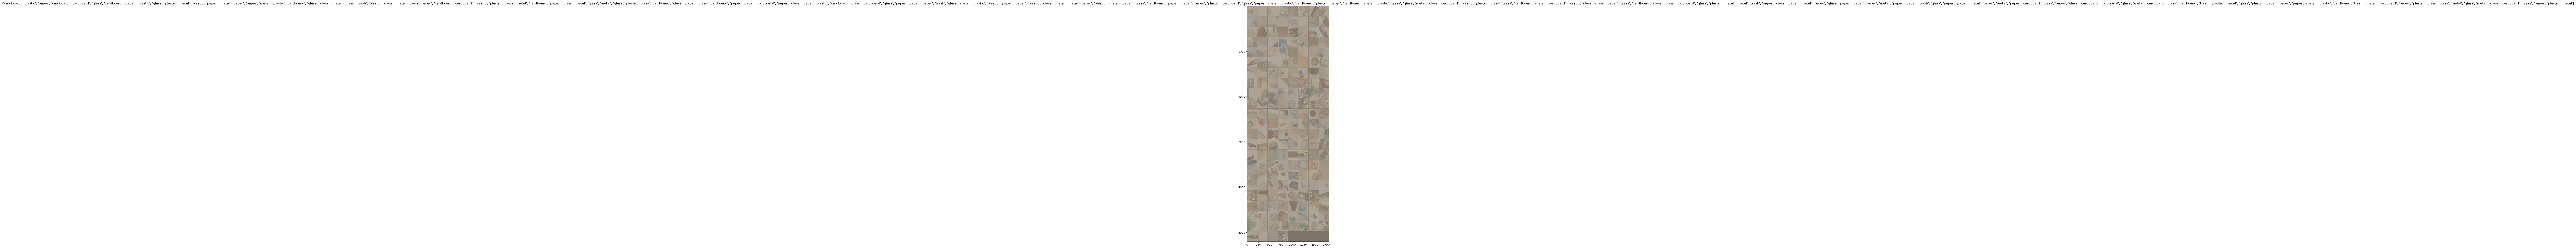

In [4]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(16,16))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
images, classes = next(iter(loader))

# Make a grid from batch
batch_grid = torchvision.utils.make_grid(images)

imshow(batch_grid, title=[labels[x] for x in classes])


labels:  ['cardboard', 'plastic', 'paper', 'cardboard', 'cardboard', 'glass', 'cardboard', 'paper', 'plastic', 'glass', 'plastic', 'metal', 'plastic', 'paper', 'metal', 'paper', 'paper', 'metal', 'plastic', 'cardboard', 'glass', 'glass', 'metal', 'glass', 'trash', 'plastic', 'glass', 'metal', 'trash', 'paper', 'cardboard', 'cardboard', 'plastic', 'plastic', 'trash', 'metal', 'cardboard', 'paper', 'glass', 'metal', 'glass', 'metal', 'glass', 'plastic', 'glass', 'cardboard', 'glass', 'paper', 'glass', 'cardboard', 'paper', 'paper', 'cardboard', 'paper', 'glass', 'paper', 'plastic', 'cardboard', 'glass', 'cardboard', 'glass', 'paper', 'paper', 'paper', 'trash', 'glass', 'metal', 'plastic', 'plastic', 'paper', 'paper', 'plastic', 'glass', 'metal', 'metal', 'paper', 'plastic', 'metal', 'paper', 'glass', 'cardboard', 'paper', 'paper', 'paper', 'plastic', 'cardboard', 'glass', 'paper', 'metal', 'plastic', 'cardboard', 'plastic', 'paper', 'cardboard', 'metal', 'plastic', 'glass', 'glass', 'met

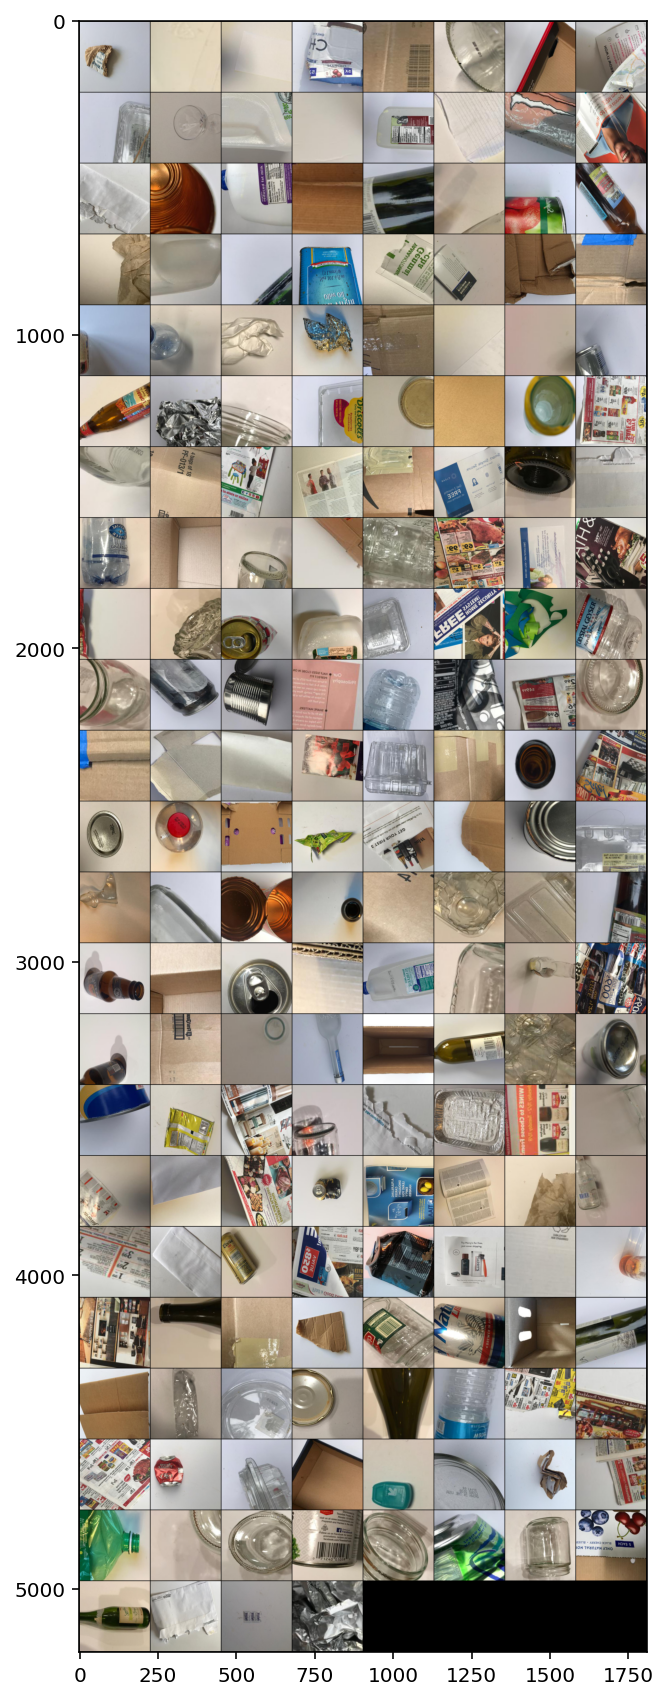

In [5]:
grid = torchvision.utils.make_grid(images, nrow=8)

plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1, 2, 0)))

print('labels: ', [labels[x] for x in classes])

## 4. Create model <a name="4"></a>
[↑ back to top ↑](#index)

In [6]:
model = models.resnet18(pretrained=True)

## 5. Train model <a name="5"></a>
Improve the training of the model using our own data set.
[↑ back to top ↑](#index)

In [7]:
# tuning parameters
learn_rate = 1e-3
epochs = 3

In [8]:
# Initialise the loss function (difference between likelihood of predicted label and actual label)

loss = nn.CrossEntropyLoss() # combination of mse and negative log likelihood

In [9]:
optimiser = torch.optim.SGD(model.parameters(), lr=learn_rate)

In [10]:
def training_loop(loader, model, loss, optimiser):
    
    total_loss = 0
    
    for batch, (images, labels) in enumerate(loader):
        
        pred = model(images)
        loss = nn.functional.cross_entropy(pred, labels)
        
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
        print(f"Batch {batch + 1} loss: {loss}") 
        
        total_loss += loss.item()
    
    print(f"Accumulated loss: {total_loss}") 

    return 
    

In [ ]:
for i in trange(epochs):
    
    print()
    print(f"Epoch {i+1}\n------------------------")
    training_loop(loader, model, loss, optimiser)
    

  0%|                                                     | 0/3 [00:00<?, ?it/s]


Epoch 1
------------------------
Batch 1 loss: 10.516868591308594
Batch 2 loss: 10.295110702514648
Batch 3 loss: 9.89566421508789
Batch 4 loss: 9.872786521911621
Batch 5 loss: 9.776981353759766
Batch 6 loss: 9.662056922912598
Batch 7 loss: 9.626591682434082
Batch 8 loss: 9.394079208374023
Batch 9 loss: 9.573110580444336
Batch 10 loss: 9.188530921936035
Batch 11 loss: 9.00996208190918
Batch 12 loss: 8.967041969299316
Batch 13 loss: 8.769044876098633
Batch 14 loss: 8.695202827453613


 33%|█████████████                          | 1/3 [1:06:48<2:13:37, 4008.59s/it]

Batch 15 loss: 7.01676607131958
Accumulated loss: 140.25979852676392

Epoch 2
------------------------
Batch 1 loss: 8.456689834594727
Batch 2 loss: 8.184303283691406
Batch 3 loss: 8.285699844360352
Batch 4 loss: 8.156901359558105
Batch 5 loss: 8.101739883422852
Batch 6 loss: 7.961519241333008
Batch 7 loss: 7.624373435974121
Batch 8 loss: 7.578123569488525
Batch 9 loss: 7.451030731201172


## 6. Visualise model predictions <a name="6"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)

## 7. Tune parameters <a name="7"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)

## 8. Execute and evaluate <a name="8"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)

## 9. Create predictor function<a name="9"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)